# Neural Network #
## Python Tutorial ##

Neural networks are computational models inspired by the human brain's structure and function, capable of learning and making predictions from complex data.

This looks something like this

![SimpleNN](https://pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg)

The example above is called a multilayer perceptron.

Neural networks process input data through layers of neurons, where each neuron applies transformations to the data using activation functions and learns to make predictions by adjusting its parameters during training, aiming to minimize prediction errors.

<i>Note: There are as many hidden layers and neurons as you want and more does not necessarily imply better</i>
<hr/>

#### Importing Libraries ####

Here are pieces of other people's code that will help as understand what we're doing along the way

To install these click terminal on whichever IDE you're using and use pip to instal eg: <code>pip install matplotlib.pyplot</code>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## How to do It ##

This is the MNIST dataset which is a dataset for training simple neural networks on handwritten digits

We will train and run our model on subsets of them

In [2]:
handwritting_data_raw = pd.read_csv("data/Handwritting_dataset/train.csv")
handwritting_data_raw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row represents the a handwritten digit in a 28 by 28 pixel grid and the value brigtness of each pixel.

This is how a digit would look

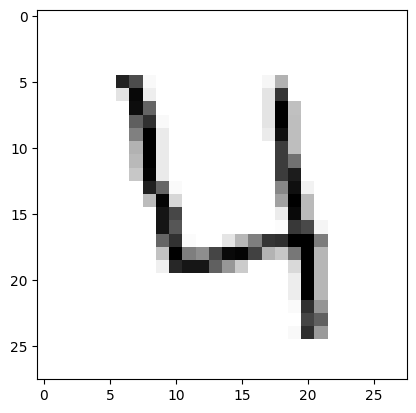

In [3]:
# convert the data to numpy arrays
hData = np.array(handwritting_data_raw).T
m, n = hData.T.shape

exampleMatrix = hData.T[3][1:].reshape(28, 28)

plt.imshow(exampleMatrix, cmap=plt.cm.binary)

## Forward Propagation ##
This is the passing of data from the input layer to the output layer through the hidden layers. Each neuron after the input to output layer has 2 components called the weights and bias. <b>Weights</b> determine the strength of influence that one neuron has with the next neuron it transmits information to. <b>Biases</b> are the initial value that a weight can possess even if all parameters are 0.

The process of information transmission is done through matrix multiplication of the input and the weights and addition of biases of each neutron much resembling a linear function. The result of this is then applied through an activation function. 

The <b>activation function</b> is a function that changes the output from being linear which gives the neural network all its magic. This is like painting a picture but now from only using straight lines we can introduce curves and contrasts. The activation then refers to the final output value.

![Yo](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*U3QZ_Yn4fcjbdUkIwHJ90w.gif)

### Math ###
<i>A basic understanding of matrices and matrix multiplication is needed<i>

So a neuron receives input and applies a linear transformation to it and apply an activation function to it.

$$ z = wx + b $$
$$ a = f(z) $$

Where

$$ w(weights) \in \mathbb{R}^{m\times1} ,\hspace{5mm} x(inputs) \in \mathbb{R}^{1\times m} ,\hspace{5mm} b(bias), \hspace{1.5mm} z(linear \hspace{1.5mm} result), \hspace{2mm} a(activation) \in  \mathbb{R}^1$$

and f is the activation function

You can scale this up to a whole layer of neurons so where for a neuron in layer i:

$$ w^{[i]} = \begin{bmatrix}w^{[i]}_1, w^{[i]}_2, & \cdots &, w^{[i]}_n \end{bmatrix}, \hspace{5mm} x^{[i]} = \begin{bmatrix}x^{[i]}_1, x^{[i]}_2, & \cdots &, x^{[i]}_n \end{bmatrix}^T \hspace{3mm} and \hspace{3mm} b^{[i]} = b^{[i]} $$

The operations in the layer can be represented with the equations:

$$ Z = WX + B$$
$$ A = f(Z) $$

where
$$ W^{[i]} = \begin{bmatrix}w^{[i]}_{11} & w^{[i]}_{12} & \cdots & w^{[i]}_{1n}\\ w^{[i]}_{21} & \ddots& \cdots & \vdots \\ \vdots & \vdots& \ddots & \vdots\\ w^{[i]}_{m1} & \cdots & \cdots & w^{[i]}_{mn}\\ \end{bmatrix}, \hspace{5mm} X^{[i]} = \begin{bmatrix}x^{[i]}_{11} & x^{[i]}_{12} & \cdots & x^{[i]}_{1n}\\ x^{[i]}_{21} & \ddots& \cdots & \vdots \\ \vdots & \vdots& \ddots & \vdots\\ x^{[i]}_{m1} & \cdots & \cdots & x^{[i]}_{mn}\\ \end{bmatrix}^T \hspace{3mm} and \hspace{3mm} B^{[i]} = \begin{bmatrix}b^{[i]}_1 \\ b^{[i]}_2 \\ \vdots \\ b^{[i]}_m\end{bmatrix} $$ 

This works because matrices can be layered

So for our neural network we will have 784 neurons in the input layers for the 28 by 28 pixel grid and I chose 1 hidden layer with 16 neurons and lastly the output layer will have 10, corresponding to the 10 digits it could be.

<i>Note: The input layer does not have any weights and biases because it introduces primary data.</i>

We first want to normalise the pixel data as each value is given from 0 to 255 which is computationally complex whereas working from 0 to 1 is much better.

When initialising The values for weights and biases can just be randomised as the values are updated after training.

In [4]:
class NeuronLayer:
    def __init__(self, inputSize, outputSize):
        # creates a randomised matrix
        self.weights = np.random.rand(outputSize, inputSize) - 0.5
        self.bias = np.random.rand(outputSize, 1) - 0.5

In [5]:
#Splitting the data
Y = hData[0]
L0 = hData[1:] / 255
L1 = NeuronLayer(784, 16)
L2 = NeuronLayer(16, 10)

For our activation function we have some guidelines to choosing one that works.
<ul>
<li><b>Non-linear</b> function, as mentioned earlier to have complexity</li>
<li>It has to be <b>differentiable</b> this is to enable optimization which will be seen later when training</li>
<li>It should have <b>appropriate range</b>. For classifying multiple classes some functions produce probability functions and for binary classification functions with a smaller range work well</li>
<li><b>Computational complexity</b> should be low and effecient to evaluate especially as training large models takes significant resources</li>
</ul>

Common activation functions are:


![activationfunctions](https://lh4.googleusercontent.com/hTeaMXYrsBlpKrGvRCvSX8maYuU4Zhd9-6B_Z3QjnnpE02MhfFK8IHgrDsX9U9SoSw9MIJFQbQyR64PHqNjGfMa8LgUctX5ht0Z21NxqJ-AAd5bU30mFGaTzNhiNuiwO2OVvpfYYFAonf3k8wQTqwGA)

The functions we use are : [ReLU]('https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png') which returns values between 0 and 1(We normalised the data) for the hidden layer and [Softmax]('https://siegel.work/blog/ActivationFunctions/img/softmax.png') which returns exaggarated probability values for the output layer

$$ ReLU(Z) = max (0,Z) $$
$$softmax(Z) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $$

In [6]:
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

Lastly lets put all these steps together to create a function called foward propagation

In [7]:
def forwardPropagation(input,hiddenlayer,output):
    Z1 = hiddenlayer.weights.dot(input) + hiddenlayer.bias
    A1 = ReLU(Z1)
    Z2 = output.weights.dot(A1) + output.bias
    A2 = softmax(Z2)
    # print(hiddenlayer['weights'])
    return Z1, A1, Z2, A2

#### Flow ####

$$ \rightarrow Z^{[1]} = X^{[0]}W^{[1]} + B^{[1]} $$ 
$$ \rightarrow A^{[1]} = f_{ReLU}(Z^{[1]}) $$
$$ \rightarrow Z^{[2]} = A^{[1]T}\hspace{1mm}W^{[2]} + B^{[2]} $$
$$ \rightarrow A^{[2]} = g_{softmax}(Z^{[2]}) $$

## Backward Propagation ##
So how does the neural network learn?

Great question! This is called backpropagation which is the key algorithm for training our model. As you can see we randomised our weights and biases when initialising, this is because adjusting each weight and bias manually would take ages.

We train our model by letting our model guess and then telling it how far it was from the correct answer to update its parameters. Your goal is to minimize the distance to the correct answer. Think of training a neural network like navigating through a maze to reach a treasure. The cost function is like a guide telling you how far you are from the treasure after each step you take. Your goal is to minimize this distance to get as close to the treasure as possible.

We call the distance to treasure the <b>Loss function</b>. We then want to change the weights and biases in each layer to minimize this. 

![bpflow](https://qph.cf2.quoracdn.net/main-qimg-aa0cc96279f525b44bbde531ec1e9a9c)


We use a method called <b>gradient descent</b>. This is subtracting a value from the parameters relative to the gradient of the loss function to approach the minimum value. It's like taking small steps down to approach the minima. The length of the step we chose to go down by is the <b>learning rate</b>.


![gradientdesc](https://media.licdn.com/dms/image/D4D12AQElGrpg2NiisQ/article-cover_image-shrink_600_2000/0/1707688084849?e=2147483647&v=beta&t=iBiIxGUrle6a1mlTadU-0vWvyVjCxW7DBa5qXqK_Qa4)


### Math ###
<i>The tricky bit. It's long and gruesome and you can colapse it if you'd like, but it is the derivation of possibly the coolest code we have ever made</i>

A decent understanding of calculus is needed but the steps we take are:
<ul>
<li>Chose a loss function</li>
<li>Minimize it with respect to weights and biases</li>
<li>Gradient descent. These are the steps that vary the weights and biases to most effeciently decrease the loss function</li>
</ul>

#### Derivations ####

We first need to chose a loss function. To keep it simple we will use a binary cross entropy loss function which simplifies well when minimizing.
$$ L = -\frac{1}{m} \sum_{i=1}^{m} \hspace{2mm} y_i\ln{\hat{y_i}} + (1-y_i)ln{(1 - \hat{y_i})} $$
$$ L = \text{loss} \hspace{5mm} m = \text{number of output neurons} \hspace{5mm} y_i = \text{correct probability} \hspace{5mm} \hat{y_i} = \text{predicted probability} $$

We can represent this with our matrix notation from before:

$$ L = -\frac{1}{m} \sum_{i=1}^{m} \hspace{2mm} y_i\ln{a^{[2]}_i} + (1-y_i)ln{(1 - a^{[2]}_i)} $$

<!-- $$ L = \frac{1}{m} \sum_{i=1}^{m} \hspace{2mm} Y\ln{A^{[2]}} + (1-Y)ln{(1 - A^{[2]})} $$ -->

As
$$ \hat{y} = a^{[2]} \hspace{5mm} $$


Now we want want this loss to decrease most for the smallest change in the weights and biases. As usual with minimization problems we need calculus. 
Differenciate the loss with respect to the predictions for a single output neuron

$$ \frac{dL}{da^{[2]}_i}= -\frac{y_i}{a^{[2]}_i} + \frac{1-y_i}{1-a^{[2]}_i}$$
We then want to then find the the minimum with respect to the weight and biases. 

To get the minimum of the loss with respect to the weights we need to calculate the partial deriavtive. Which we can use the chain rule:

$$ \frac{dL}{dz^{[2]}_i} =  \frac{\partial L}{\partial a^{[2]}_i}  \frac{\partial a^{[2]}_i}{\partial z^{[2]}_i} $$
<!-- $$ \frac{dL}{dZ} =  \frac{\partial L}{\partial A^{[2]}}  \frac{\partial A^{[2]}}{\partial Z^{[2]}}, \hspace{5mm} \frac{\partial L}{\partial W^{[2]}} = \frac{\partial L}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} \hspace{5mm} and \hspace{5mm} \frac{\partial L}{\partial B^{[2]}} = \frac{\partial L^{[2]}}{\partial Z^{[2]}}  \frac{\partial Z^{[2]}}{\partial B^{[2]}}$$ -->






Since 
$$ a^{[2]}_i = g(z^{[2]}_i)$$

Therefore:
$$ \frac{\partial a^{[2]}_i}{\partial z^{[2]}_i} = g'(z^{[2]}_i) $$

G is our softmax function who's formula is:
$$g(Z) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $$

Now we get the derivative using the quotient rule:
$$ g'(Z) = \frac{e^{z_i}(\sum_{j=1}^{N} e^{z_j}) - e^{z_i}(e^{z_i})}{(\sum_{j=1}^{N} e^{z_j})^2} $$

We factorize:

$$ g'(Z) = (\frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}) (\frac{\sum_{j=1}^{N} e^{z_j}-e^{z_i}} {\sum_{j=1}^{N} e^{z_j}}) $$

We can split the latter part further:

$$g'(Z) = (\frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}) (1 -\frac{e^{z_i}} {\sum_{j=1}^{N} e^{z_j}})$$

Now substitute g(Z) where you can:

$$ g'(Z) = g(Z) (1 - g(Z)) = A (1 - A)$$

It cleans up nicely

Now we substitute that in to find dl/dz we get
$$ \frac{\partial L}{\partial z^{[2]}_i} =  (-\frac{y_i}{a^{[2]}_i} + \frac{1-y_i}{1-a^{[2]}_i}) \times a^{[2]}_i(1-a^{[2]}_i)$$

This simplifies to give us our first computed equation:
$$ \frac{dL}{dz^{[2]}_i} = a^{[2]}_i - y_i $$ 

We can then scale this up for the whole layer(without the summation):
$$ \frac{dL}{dZ^{[2]}} = \frac{1}{m}(A^{[2]} - Y) \tag{1}$$ 

To get those equations with respect to w and b we multiply that with dz/dw and dz/db.
Remember:
$$ Z^{[2]} =  W^{[2]}A^{[1]} + B^{[2]} $$

so:
$$ \frac{\partial Z^{[2]}}{\partial W^{[2]}} = A^{[1]T},  \hspace{5mm} \frac{\partial Z^{[2]}}{\partial B^{[2]}} = 1 $$

Combining to get:
$$ \frac{\partial L}{\partial W^{[2]}} = dZ \times A^{[1]T} \tag{2} $$

Notice in our equations we don't have the summation, this is beacuse the for the weights in the previous neurons are matrices. However since the bias are singular values we reintroduce the sum:
$$  \frac{\partial L}{\partial B^{[2]}} = \sum{dZ^{[2]}} \tag{3}$$


Now we continue the chain rule to get the values for all previous weights and biases in the same way

$$ \frac{\partial Z^{[2]}}{\partial A^{[1]}} = W^{[2]T},\hspace{5mm}\frac{\partial A^{[1]}}{\partial Z^{[1]}} = f^\prime(Z^{[1]}) \text{ (1 or 0)}, \hspace{5mm}\frac{\partial Z^{[1]}}{\partial W^{[1]}} = X, \hspace{5mm}\frac{\partial Z^{[1]}}{\partial B^{[1]}} = 1 $$

Also for any derivative of the loss will be represented in short hand
$$ \frac{\partial L}{\partial A^{[1]}}  =  dZ^{[2]}\hspace{1mm}W^{[2]T} \tag{4}  $$
$$ \frac{\partial L}{\partial Z^{[1]}}  =  dA^{[1]} \times f^\prime(Z^{[1]}) \tag{5} $$
$$ \frac{\partial L}{\partial W^{[1]}}  =  dZ^{[1]}\hspace{1mm}X^{[0]T} \tag{6}  $$
$$ \frac{\partial L}{\partial B^{[1]}}  =   \sum{dZ^{[1]}} \tag{7}  $$

### Final equations ###

Derivatives
$$ dZ^{[2]} = \frac{A^{[2]} - Y}{m} $$
$$ dW^{[2]} = dZ^{[2]}A^{[2]T} $$
$$ dB^{[2]} = \sum{dZ^{[2]}}$$
$$ dA^{[1]} = W^{[2]T}dZ^{[2]} $$
$$ dZ^{[1]} = dA^{[1]} \times f^{\prime} (Z^{[1]})$$
$$ dW^{[1]} = dZ^{[1]} A^{[0]T}$$
$$ dB^{[1]} = \sum{dZ^{[1]}}$$

Now we can implement this in code. We also have to encode Y such that it gives a value for 1 on the correct digit and 0 for everything else.

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def dReLU(Z):
    # If true multiplie by 1 and 0 otherwise
    return Z > 0


def gradients(Z1, A1, A2, W2, X, Y):
    hotY = one_hot(Y)
    dZ2 = (1/m) * (A2 - hotY)
    dW2 = dZ2.dot(A1.T)
    dB2 = np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = dZ1.dot(X.T)
    dB1 = np.sum(dZ1)
    return dW1, dB1, dW2, dB2

Changes
$$ W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$ B^{[2]} := B^{[2]} - \alpha dB^{[2]}$$
$$ W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$ B^{[1]} := B^{[1]} - \alpha dB^{[1]}$$

In [9]:
def gradientDescent(L1, L2, dW1, dB1, dW2, dB2, alpha):
    L1.weights -= alpha * dW1
    L1.bias -= alpha * dB1
    L2.weights -= alpha * dW2
    L2.bias -= alpha * dB2
    return L1, L2

Now combine into a function called back propagation

In [10]:
def backPropagation(Y, L0, L1, L2, Z1, A1, A2, alpha):
    dW1, dB1, dW2, dB2 = gradients(Z1, A1, A2, L2.weights, L0, Y)
    L1, L2 = gradientDescent(
        L1,
        L2,
        dW1,
        dB1,
        dW2,
        dB2,
        alpha,
    )
    return L1, L2

## Train ##
Now let's prepare to train and test our model

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [12]:
def Train(Y, L0, L1, L2, alpha, iterations):

    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardPropagation(L0, L1, L2)
        L1, L2 = backPropagation(Y, L0, L1, L2, Z1, A1, A2, alpha)
        
        if i % 50 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            
            print( f"Iteration:", i, "Accuracy:", round(accuracy, 6) )
    return L1, L2

In [13]:
L1, L2 = Train(Y, L0, L1, L2,  0.1, 1000)

Iteration: 0 Accuracy: 0.064214
Iteration: 50 Accuracy: 0.63969
Iteration: 100 Accuracy: 0.739143
Iteration: 150 Accuracy: 0.782143
Iteration: 200 Accuracy: 0.806476
Iteration: 250 Accuracy: 0.825262
Iteration: 300 Accuracy: 0.837738
Iteration: 350 Accuracy: 0.84769
Iteration: 400 Accuracy: 0.855738
Iteration: 450 Accuracy: 0.861929
Iteration: 500 Accuracy: 0.867405
Iteration: 550 Accuracy: 0.871857
Iteration: 600 Accuracy: 0.875881
Iteration: 650 Accuracy: 0.879381
Iteration: 700 Accuracy: 0.882071
Iteration: 750 Accuracy: 0.884857
Iteration: 800 Accuracy: 0.887071
Iteration: 850 Accuracy: 0.888857
Iteration: 900 Accuracy: 0.890714
Iteration: 950 Accuracy: 0.892714


### Testing our model ###
We can no see how accurate our model is on data it hasn't seen before

Lets first import our test set

In [14]:
handwritting_test_data_raw = pd.read_csv("data/Handwritting_dataset/test.csv")
testData = np.array(handwritting_test_data_raw).T / 255

Write some methods to visualise the test

In [15]:
def makePredictions(X,L1, L2):
    Z1, A1, Z2, A2 = forwardPropagation(X, L1, L2)
    predictions = get_predictions(A2)
    return predictions


def testPrediction(index,L1, L2):
    current_image = testData[:, index, None]
    prediction = makePredictions(testData[:, index, None], L1, L2)
    print("Prediction: ", prediction)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

In [16]:
import random

def randomTest(n, L1, L2):
    for i in range(n):
        randomNum = random.randrange(0, testData[0].size)
        testPrediction(randomNum,L1,L2)

Prediction:  [8]


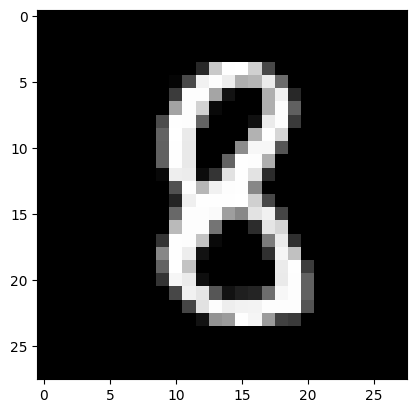

Prediction:  [4]


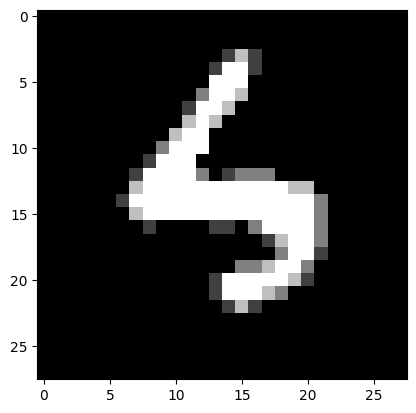

Prediction:  [4]


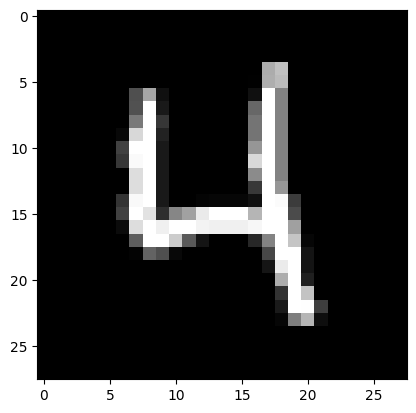

In [17]:
randomTest(3,L1,L2)

## Some notes ##
The functions chosen above are arbitrary and you can swap them out and their equations.

This is a simple neural network and there are multiple types of them like convolutional or radial basis, which have been optimised for specific problems, however the underlying concepts are the same.

If the math wasn't comprehensive there are hundreds of tutorials that explain much better or with better mathematical rigour than this.

## Neural net generalisation ##

In [18]:
class NeuronLayer:
    def __init__(self, inputSize, outputSize):
        self.weights = np.random.rand(outputSize, inputSize) - 0.5
        self.bias = np.random.rand(outputSize, 1) - 0.5


class NeuralNet:
    L = []
    numOutputs = 0
    propagationSteps = 0

    # Initialize
    def __init__(self, input, numNeuronsPerLayer):
        self.L = []
        self.L.append(input)
        numLayers = len(numNeuronsPerLayer)
        
        for i in range(numLayers):
            if i != 0:
                self.L.append(
                    NeuronLayer(numNeuronsPerLayer[i - 1], numNeuronsPerLayer[i])
                )

        self.numOutputs = numNeuronsPerLayer[-1]
        self.propagationSteps = numLayers - 1

    # Forward propagation functions
    def ReLU(self, Z):
        return np.maximum(Z, 0)

    def softmax(self, Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A

    def forwardPropagation(self):
        L = self.L
        pSteps = self.propagationSteps
        Z = []
        A = [self.L[0]]
        for i in range(pSteps):
            if i == pSteps - 1:
                Z.append(L[i + 1].weights.dot(A[i]) + L[i + 1].bias)
                A.append(self.softmax(Z[i]))
            else:
                Z.append(L[i + 1].weights.dot(A[i]) + L[i + 1].bias)
                A.append(self.ReLU(Z[i]))

        return A, Z

    # Back propagation functions
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y

    def dReLU(self, Z):
        return Z > 0

    def gradients(self, A, Z, Y):
        L = self.L
        pSteps = self.propagationSteps
        m = self.numOutputs
        dZ = []
        dW = []
        dB = []
        hotY = self.one_hot(Y)
        dZ.append((1 / m) * (A[pSteps] - hotY))

        for i in range(pSteps):
            dW.append(dZ[i].dot(A[pSteps - i - 1].T))
            dB.append(np.sum(dZ[i]))
            if i < pSteps - 1:
                dZ.append(L[pSteps - i].weights.T.dot(dZ[i]) * self.dReLU(Z[i]))

        dZ = dZ[::-1]
        dW = dW[::-1]
        dB = dB[::-1]
        return dW, dB

    def gradientDescent(self, dW, dB, alpha):
        for i in range(self.propagationSteps):
            self.L[i + 1].weights -= alpha * dW[i]
            self.L[i + 1].bias -= alpha * dB[i]

    def backPropagation(self, Y, A, Z, alpha):
        dW, dB = self.gradients(A, Z, Y)
        self.gradientDescent(dW, dB, alpha)

    def get_predictions(self, O):
        return np.argmax(O, 0)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def Train(self, Y, alpha, iterations):
        for i in range(iterations):
            A, Z = self.forwardPropagation()
            self.backPropagation(Y, A, Z, alpha)

            if i % 10 == 0:
                predictions = self.get_predictions(A[-1])
                accuracy = self.get_accuracy(predictions, Y)

                print(f"Iteration:", i, "Accuracy:", round(accuracy, 6))